# 📦 Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# 🔽 Download NLTK resources (run once)

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# 📂 Load dataset

In [5]:
from google.colab import files
uploaded = files.upload()


Saving Spam_Data.csv to Spam_Data.csv


In [6]:
df = pd.read_csv("Spam_Data.csv")

# 🧐 Check first few rows

In [7]:
print(df.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


Dataset Rows & Columns count

In [8]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])


Number of rows are:  5572
Number of columns are:  2


Dataset Information


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#Understanding The Variables

In [10]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [11]:
df.describe(include= 'all').round(2)

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


Check Unique Values for each variable.

In [12]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Category is 2
No. of unique values in Message is 5157


#Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

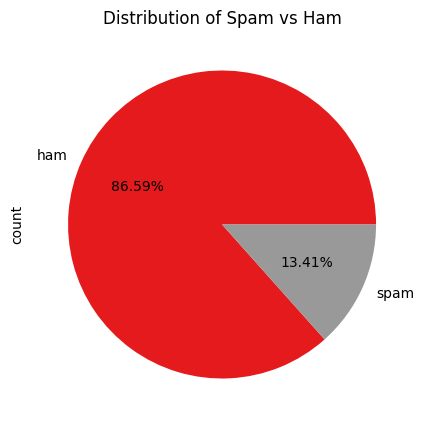

In [13]:
import matplotlib.pyplot as plt  # <-- make sure this is included

# Count the values in the 'Category' column
spread = df['Category'].value_counts()

# Set the figure size
plt.rcParams['figure.figsize'] = (5,5)

# Plot the pie chart
spread.plot(kind='pie', autopct='%1.2f%%', cmap='Set1')
plt.title('Distribution of Spam vs Ham')

# Display the chart
plt.show()


#Duplicate Values

In [14]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [15]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [16]:
df_spam = df[df['Category']=='spam'].copy()

Most Used Words in Spam Messages

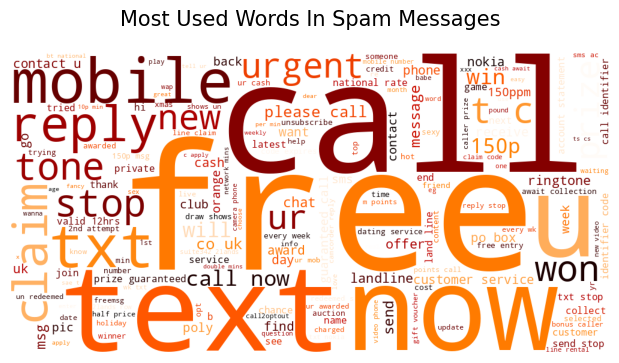

In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# Remove the stopwords
stopwords = set(STOPWORDS)

# Iterate through the 'Message' column of spam messages
for val in df_spam['Message']:
    val = str(val)  # Ensure it's a string
    tokens = val.split()  # Split into words
    tokens = [word.lower() for word in tokens]  # Lowercase
    comment_words += " ".join(tokens) + " "

# Generate the WordCloud
wordcloud = WordCloud(width=1000, height=500,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10,
                      max_words=1000,
                      colormap='gist_heat_r').generate(comment_words)

# Plot the WordCloud
plt.figure(figsize=(6,6), facecolor=None)
plt.title('Most Used Words In Spam Messages', fontsize=15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


#Feature Engineering & Data Pre-processing

In [18]:
def clean_text(text):
    text = text.lower()                                   # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)   # remove URLs
    text = re.sub(r'\d+', '', text)                       # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokens = text.split()                                 # tokenize
    tokens = [w for w in tokens if w not in stop_words]   # remove stopwords
    tokens = [lemmatizer.lemmatize(w) for w in tokens]    # lemmatize
    return ' '.join(tokens)


In [19]:
df['clean_text'] = df['Message'].apply(clean_text)


In [20]:
X = df['Message']
y = df['Category']

In [21]:
from sklearn.model_selection import train_test_split

# Assuming 'Category' is the target column with spam/ham labels
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.25, random_state=42)


In [22]:
vectorizer = TfidfVectorizer(max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [23]:
print("Training data shape:", X_train_vec.shape)
print("Testing data shape:", X_test_vec.shape)

Training data shape: (3867, 3000)
Testing data shape: (1290, 3000)


In [24]:
import pickle
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))
pickle.dump((X_train_vec, X_test_vec, y_train, y_test), open('processed_data.pkl', 'wb'))

print("✅ Data preprocessing completed successfully!")

✅ Data preprocessing completed successfully!


**Model Selection**

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
import pickle

# Loading the vectorizer and processed data
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))
X_train_vec, X_test_vec, y_train, y_test = pickle.load(open('processed_data.pkl', 'rb'))

print("Data loaded successfully!")
print("Training data shape:", X_train_vec.shape)
print("Testing data shape:", X_test_vec.shape)

Data loaded successfully!
Training data shape: (3867, 3000)
Testing data shape: (1290, 3000)


Naive-Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Training model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Predictions
y_pred = nb_model.predict(X_test_vec)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9767441860465116

Confusion Matrix:
 [[1124    0]
 [  30  136]]

Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1124
        spam       1.00      0.82      0.90       166

    accuracy                           0.98      1290
   macro avg       0.99      0.91      0.94      1290
weighted avg       0.98      0.98      0.98      1290



Logistic Regression


In [28]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vec, y_train)
print("Logistic Regression Accuracy:", lr_model.score(X_test_vec, y_test))


Logistic Regression Accuracy: 0.9751937984496124


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label='spam'),
        "Recall": recall_score(y_test, y_pred, pos_label='spam'),
        "F1 Score": f1_score(y_test, y_pred, pos_label='spam')
    }

import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)


                     Accuracy  Precision    Recall  F1 Score
Naive Bayes          0.976744   1.000000  0.819277  0.900662
Logistic Regression  0.975194   0.985507  0.819277  0.894737
SVM                  0.985271   0.956522  0.927711  0.941896
Random Forest        0.979845   0.992958  0.849398  0.915584


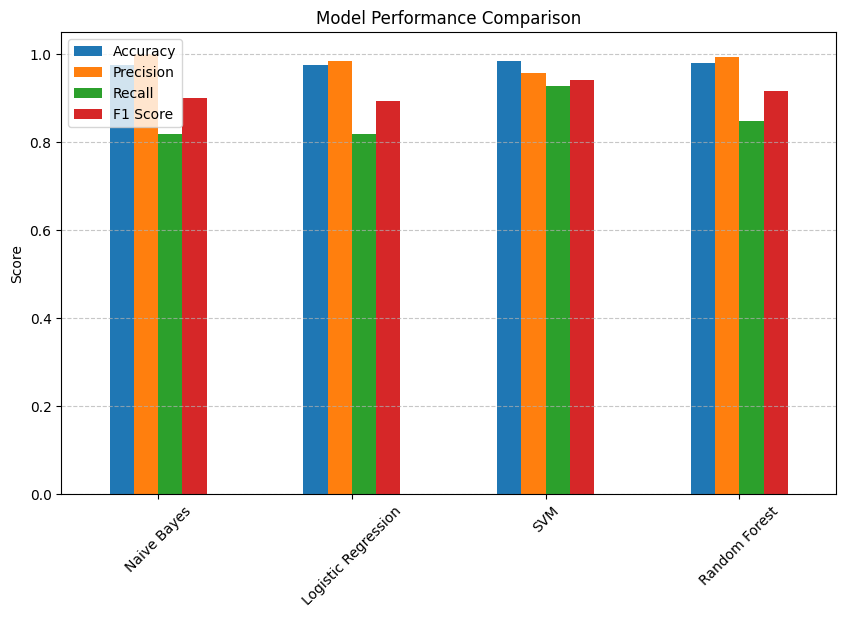

In [30]:
import matplotlib.pyplot as plt

results_df.plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
